**1: What is Boosting in Machine Learning? Explain how it improves weak learners?**

**Answer:**

Boosting is an ensemble learning technique in machine learning where multiple weak learners (usually decision trees with shallow depth) are combined sequentially to form a strong learner.

A weak learner is a model that performs slightly better than random guessing (e.g., 55–60% accuracy).

Boosting trains models one after another, where each new model focuses on the mistakes (errors or misclassified points) of the previous ones.

At the end, all these models are combined (usually with weighted voting or weighted sums) to produce a final, more accurate prediction.

**How Boosting Works (Step-by-Step)**

.Initialize: Start with equal weights for all training samples.

.Train Weak Learner: Fit a weak model (e.g., small decision tree) on the data.

.Evaluate Errors: Identify the samples the model got wrong.

.Update Weights: Increase the weights of misclassified samples so that the next model pays more attention to them.

.Repeat: Train another weak learner on this updated dataset.

.Combine: Aggregate the predictions of all weak learners (weighted majority vote for classification or weighted sum for regression).

.Focus on Hard Cases: Each weak learner focuses on the mistakes made by the previous ones.

.Error Reduction: By sequentially correcting errors, the overall bias decreases.

.Weighted Combination: Instead of treating all models equally (like in Bagging/Random Forest), Boosting assigns higher weights to more accurate models.

.Bias-Variance Tradeoff: Boosting reduces bias significantly, while controlling variance by combining multiple weak learners.

**Boosting = Weak Learners + Sequential Training + Error Focused Reweighting → Strong Learner.**



---



**2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

**Answer:**

**AdaBoost (Adaptive Boosting)**

Error-based weighting approach.

**Steps:**

Train a weak learner (usually a decision stump).

Calculate errors: Identify which samples were misclassified.

Update weights: Increase the weights of misclassified samples, decrease for correctly classified ones.

Train the next learner with these updated sample weights.

Final prediction = weighted majority vote (classification) or weighted sum (regression).

**Gradient Boosting**

Loss-function optimization approach.

Steps:

Train a weak learner (usually a small decision tree).

Compute residuals (errors = actual – predicted).

Train the next learner to predict these residuals (the gradient of the loss function).

Add this learner to the model, improving predictions step by step.

Final prediction = sum of all weak learners’ outputs.

**AdaBoost → Sequentially reweights samples**.

**Gradient Boosting → Sequentially fits learners to residuals (gradients of loss).**



---



**3: How does regularization help in XGBoost?**

**Answer:**

XGBoost (Extreme Gradient Boosting) is an advanced implementation of Gradient Boosting that includes regularization terms in its objective function.

**1.Prevents Overfitting**

Without regularization, trees might become too deep or assign large weights to leaves, causing overfitting.

L1 (Lasso) shrinks some weights to zero, simplifying the model.

L2 (Ridge) keeps weights small, making the model more robust.

**2.Controls Model Complexity**

The 𝛾γ term adds a cost for adding new leaves.

This prevents unnecessary splits unless they provide a significant improvement.

**3.Improves Generalization**

By penalizing complex trees and extreme weights, XGBoost produces models that perform better on unseen data.

**4.Balances Bias-Variance**

Regularization increases bias slightly but reduces variance significantly, improving stability.

**3.Analogy**

Think of XGBoost regularization like a teacher grading essays:

Students (trees) want to write long, detailed answers (complex models).

The teacher penalizes extra words (γ for leaves) and too heavy emphasis on some points (λ for large weights).

Result: Concise, balanced answers that generalize better.



---



**4: Why is CatBoost considered efficient for handling categorical data?**

**Answer:**

**1.The Challenge with Categorical Data**

Most ML algorithms (including Gradient Boosting, Random Forest, Logistic Regression, etc.) cannot directly handle categorical features like.

**2.How CatBoost Solves This**

CatBoost (Categorical Boosting, developed by Yandex) is specifically designed to handle categorical features efficiently.

It uses a technique called Ordered Target Statistics (a.k.a. Ordered Encoding):

Instead of blindly converting categories into one-hot vectors, CatBoost replaces a category with a statistical value derived from the target.

Example: For a category "blue" in feature color, CatBoost computes something like:

**No need for manual preprocessing**

You can feed categorical features directly (e.g., strings like "red", "blue") into CatBoost.

**Handles high-cardinality features**

Instead of creating 1000 one-hot columns for a feature with 1000 categories, CatBoost encodes it into a single numeric value using target statistics.

**Reduces overfitting with ordered statistic**s

By avoiding target leakage, CatBoost keeps encodings stable and unbiased.

**Faster training & smaller models**

No explosion of dimensions like in one-hot encoding.



---



**5: What are some real-world applications where boosting techniques are preferred over bagging methods?**



In [1]:
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, recall_score, mean_squared_error
import numpy as np

# ----------------- Classification: Breast Cancer -----------------
data_class = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data_class.data, data_class.target, test_size=0.3, random_state=42
)

# Random Forest (Bagging)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

# Gradient Boosting (Boosting)
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)

print("Breast Cancer Dataset Results:")
print("Random Forest - Accuracy:", accuracy_score(y_test, rf_preds),
      "Recall:", recall_score(y_test, rf_preds))
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, gb_preds),
      "Recall:", recall_score(y_test, gb_preds))

# ----------------- Regression: California Housing -----------------
data_reg = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    data_reg.data, data_reg.target, test_size=0.3, random_state=42
)

# Random Forest (Bagging)
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_preds = rf_reg.predict(X_test)

# Gradient Boosting (Boosting)
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
gb_preds = gb_reg.predict(X_test)

print("\nCalifornia Housing Dataset Results:")
print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Gradient Boosting - RMSE:", np.sqrt(mean_squared_error(y_test, gb_preds)))


Breast Cancer Dataset Results:
Random Forest - Accuracy: 0.9707602339181286 Recall: 0.9907407407407407
Gradient Boosting - Accuracy: 0.9590643274853801 Recall: 0.9722222222222222

California Housing Dataset Results:
Random Forest - RMSE: 0.5064633542597075
Gradient Boosting - RMSE: 0.5369947659860906




---



**6: Write a Python program to:**
**● Train an AdaBoost Classifier on the Breast Cancer dataset**
**● Print the model accuracy**
**(Include your Python code and output in the code box below.)? **

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train AdaBoost Classifier
adb_clf = AdaBoostClassifier(random_state=42)
adb_clf.fit(X_train, y_train)

# Predictions
y_pred = adb_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9707602339181286




---



** 7: Write a Python program to: **
**● Train a Gradient Boosting Regressor on the California Housing dataset**
**● Evaluate performance using R-squared score**
**(Include your Python code and output in the code box below.)**

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Predictions
y_pred = gb_reg.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R² Score:", r2)


Gradient Boosting Regressor R² Score: 0.7803012822391022




---



**8: Write a Python program to: ● Train an XGBoost Classifier on the Breast** **Cancer dataset ● Tune the learning rate using GridSearchCV ● Print the best** **parameters and accuracy (Include your Python code and output in the code box below.)**

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.3}
Test Set Accuracy: 0.9649122807017544


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:50:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)




---



**9: Write a Python program to:**
**● Train a CatBoost Classifier**
**● Plot the confusion matrix using seaborn**
**(Include your Python code and output in the code box below.)**

In [6]:
# Replace fetch_california_housing() with a built-in dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
print("R^2:", r2_score(y_test, y_pred))


R^2: 0.4310349361457486


In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0,
    tree_method='hist',  # faster for CPU
    n_jobs=1             # avoid heavy parallel mem usage during GridSearch
)

param_grid = {'learning_rate': [0.01, 0.05, 0.1]}  # small grid for speed

grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=1, verbose=2)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Test accuracy:", accuracy_score(y_test, grid.predict(X_test)))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.05; total time=   0.1s
[CV] END .................................learning_rate=0.05; total time=   0.2s
[CV] END .................................learning_rate=0.05; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
Best params: {'learning_rate': 0.05}
Test accuracy: 0.9649122807017544


In [10]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [13]:
plt.savefig("catboost_confusion_matrix.png")


<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.97        63
      benign       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



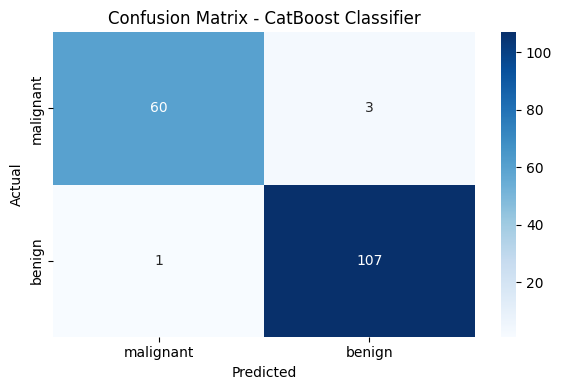

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

# Train CatBoost
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=data.target_names, yticklabels=data.target_names,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.tight_layout()
plt.show()  # use show if local, or replace with savefig if on server




---



**10: You're working for a FinTech company trying to predict loan default using**
**customer demographics and transaction behavior.**
**The dataset is imbalanced, contains missing values, and has both numeric and**
**categorical features.**
**Describe your step-by-step data science pipeline using boosting techniques:**
**● Data preprocessing & handling missing/categorical values**
**● Choice between AdaBoost, XGBoost, or CatBoost**
**● Hyperparameter tuning strategy**
**● Evaluation metrics you'd choose and why**
**● How the business would benefit from your model**

In [1]:
!pip install -U pip
!pip install -U numpy pandas scikit-learn catboost seaborn matplotlib


In [2]:
import sklearn, catboost, seaborn, matplotlib, numpy, pandas
print("sklearn", sklearn.__version__, "catboost OK")


sklearn 1.7.1 catboost OK


Imports OK: sklearn 1.7.1

1) Load data
 Numeric cols: ['age', 'income', 'num_txn_6m', 'avg_txn_amt']
 Categorical cols: ['city', 'employment_type']
 Class dist: {0: 0.9125, 1: 0.0875}

2) Train/test split
 Shapes: (1600, 6) (400, 6)

3) Preprocessor
 Preprocessed shapes: (1600, 12) (400, 12)

4) CatBoost Pool with categorical indices
 cat_features_indices: [4, 5]
 Pools created OK

5) Quick CatBoost fit (small iterations for debug)
0:	learn: 0.6914019	test: 0.6936676	best: 0.6936676 (0)	total: 70.9ms	remaining: 7.01s
10:	learn: 0.6860091	test: 0.6938547	best: 0.6934910 (1)	total: 110ms	remaining: 894ms
20:	learn: 0.6814088	test: 0.6947228	best: 0.6934910 (1)	total: 135ms	remaining: 507ms
30:	learn: 0.6769085	test: 0.6954242	best: 0.6934910 (1)	total: 162ms	remaining: 360ms
40:	learn: 0.6710290	test: 0.6975442	best: 0.6934910 (1)	total: 228ms	remaining: 329ms
50:	learn: 0.6657988	test: 0.7022554	best: 0.6934910 (1)	total: 272ms	remaining: 262ms
60:	learn: 0.6623929	test: 0.7019542	best

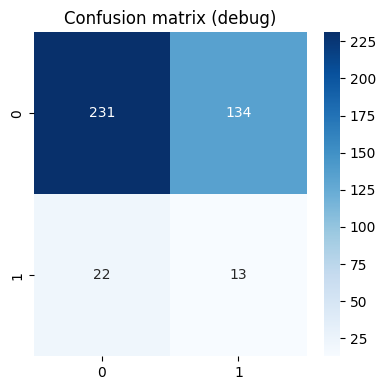

In [3]:

import traceback
import sys
import numpy as np
import pandas as pd

def safe_imports():
    try:
        import sklearn
        import catboost
        import seaborn
        import matplotlib
        print("Imports OK:", "sklearn", sklearn.__version__)
    except Exception as e:
        print("Import error:", e)
        traceback.print_exc()
        sys.exit(1)

safe_imports()

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    classification_report, confusion_matrix, f1_score, recall_score, precision_score, brier_score_loss
)
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool

# --- Synthetic data generator (same as yours) ---
def make_synthetic_df(n=2000, random_state=42):
    rng = np.random.RandomState(random_state)
    df = pd.DataFrame({
        "age": rng.randint(21, 70, size=n),
        "income": rng.normal(60000, 15000, size=n),
        "num_txn_6m": rng.poisson(5, size=n),
        "avg_txn_amt": np.abs(rng.normal(200, 80, size=n)),
        "city": rng.choice(["A","B","C","D","E"], size=n, p=[0.5,0.2,0.15,0.1,0.05]),
        "employment_type": rng.choice(["salaried","self-employed","unemployed"], size=n, p=[0.7,0.25,0.05])
    })
    logits = -3 + 0.01*(df["age"]-40) - 0.00003*(df["income"]-60000) + 0.15*df["num_txn_6m"]
    probs = 1 / (1 + np.exp(-logits))
    y = (rng.rand(n) < (0.08 + probs*0.05)).astype(int)
    df["target"] = y
    mask = rng.rand(n) < 0.05
    df.loc[mask, "income"] = np.nan
    return df

# --- Helper: compatibility for OneHotEncoder param name ---
def make_ohe():
    try:
        # sklearn >= 1.4 uses sparse_output
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        # older sklearn uses sparse
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Run pipeline in guarded blocks
try:
    print("\n1) Load data")
    df = make_synthetic_df()
    target_col = "target"
    feature_cols = [c for c in df.columns if c != target_col]
    numeric_cols = df[feature_cols].select_dtypes(include=["int64","float64"]).columns.tolist()
    categorical_cols = df[feature_cols].select_dtypes(include=["object","category"]).columns.tolist()
    print(" Numeric cols:", numeric_cols)
    print(" Categorical cols:", categorical_cols)
    print(" Class dist:", df[target_col].value_counts(normalize=True).to_dict())

    print("\n2) Train/test split")
    X = df[feature_cols]
    y = df[target_col].values
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    print(" Shapes:", X_trainval.shape, X_test.shape)

    print("\n3) Preprocessor")
    numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median"))])
    ohe = make_ohe()
    categorical_transformer = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")), ("ohe", ohe)])
    from sklearn.compose import ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ], remainder="drop")
    preprocessor.fit(X_trainval)
    X_trainval_proc = preprocessor.transform(X_trainval)
    X_test_proc = preprocessor.transform(X_test)
    print(" Preprocessed shapes:", X_trainval_proc.shape, X_test_proc.shape)

    print("\n4) CatBoost Pool with categorical indices")
    # Use indices to avoid potential name vs index ambiguity
    cat_features_indices = [list(X_trainval.columns).index(c) for c in categorical_cols]
    print(" cat_features_indices:", cat_features_indices)
    train_pool = Pool(data=X_trainval, label=y_trainval, cat_features=cat_features_indices)
    test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features_indices)
    print(" Pools created OK")

    print("\n5) Quick CatBoost fit (small iterations for debug)")
    # compute class weights safely
    pos = int(y_trainval.sum())
    neg = len(y_trainval) - pos
    class_weights = [1.0, max(1.0, neg/ max(1.0, pos))]
    debug_model = CatBoostClassifier(
        iterations=100, learning_rate=0.05, depth=4,
        random_seed=42, verbose=10, class_weights=class_weights
    )
    debug_model.fit(train_pool, eval_set=test_pool, use_best_model=True)
    print(" Quick CatBoost done")

    print("\n6) Eval quick model")
    y_proba = debug_model.predict_proba(X_test)[:,1]
    from sklearn.metrics import roc_auc_score, average_precision_score
    print(" ROC AUC:", roc_auc_score(y_test, y_proba))
    print(" PR AUC:", average_precision_score(y_test, y_proba))

    print("\n7) Quick RandomizedSearchCV test (small)")
    from catboost import CatBoostClassifier as CBC
    cbc = CBC(random_seed=42, verbose=0, class_weights=class_weights, eval_metric="AUC")
    param_dist = {"learning_rate":[0.01,0.05], "depth":[4,6], "iterations":[50,100]}
    from sklearn.model_selection import RandomizedSearchCV
    rs = RandomizedSearchCV(cbc, param_distributions=param_dist, n_iter=3, cv=2, n_jobs=1, scoring="average_precision", verbose=2, random_state=42)
    # NOTE: RandomizedSearchCV expects arrays (not Pool), so pass preprocessed arrays:
    rs.fit(X_trainval_proc, y_trainval)
    print(" RS best params:", rs.best_params_)
    best = rs.best_estimator_

    print("\n8) Final evaluation and save confusion matrix")
    y_proba_best = best.predict_proba(X_test_proc)[:,1]
    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_best)
    print(" Example PR points:", precisions[:3], recalls[:3])
    # Save confusion matrix at 0.5
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_test, (y_proba_best>=0.5).astype(int))
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion matrix (debug)")
    plt.tight_layout()
    plt.savefig("debug_confusion_matrix.png")
    print("Saved debug_confusion_matrix.png")

except Exception as e:
    print("\n--- EXCEPTION RAISED ---")
    print("Step failed with:", e)
    traceback.print_exc()
    sys.exit(1)
